### Grassy Knoll

Data format really wants something more refined than a pandas csv read but with a lot of delimiters specified, it works... its not speedy though

In [2]:
import os
import glob #python >= 3.5

import datetime
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [4]:
root_path = '/Users/bell/in_and_outbox/Ongoing_Analysis/2019_SailDrone_RadsIntercomparison/GrassyKnoll_PreSaildrone/'

swdata = {}
lwdata = {}

for filename in sorted(glob.iglob(root_path+'/*SW*.txt', recursive=True), reverse=True):
    swdata.update({filename.split('/')[-1]: pd.read_csv(filename,header=None,
                                                        sep='"|,|SW Rn', engine='python',
                                                        usecols=[1,4],names=['time','sw'],
                                                        parse_dates=True,index_col='time')})
    

In [5]:
for filename in sorted(glob.iglob(root_path+'/*LW*.txt', recursive=True), reverse=True):
    lwdata.update({filename.split('/')[-1]: pd.read_csv(filename,header=None,
                                                        sep='"|,|Rd|D|C|LW Rn', engine='python',
                                                        usecols=[1,4,6,8,10],names=['time','lwnet','c1','c2','lw'],
                                                        parse_dates=True,index_col='time')})

### Plot Timeseries of Each Instrument including temperatures

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


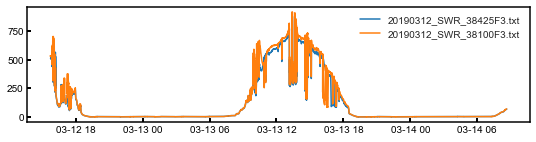

In [6]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value,label=unit)

plt.legend()


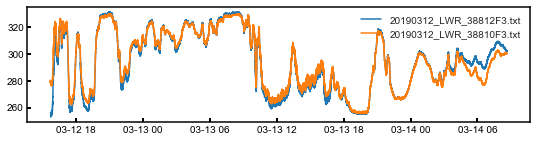

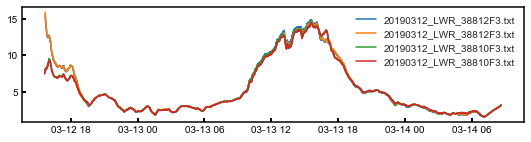

In [7]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in lwdata.items():
    plt.plot(value.lw,label=unit)

plt.legend()

fig = plt.figure(2,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in lwdata.items():
    plt.plot(value.c1,label=unit)
    plt.plot(value.c2,label=unit)

plt.legend()



### Difference Plots

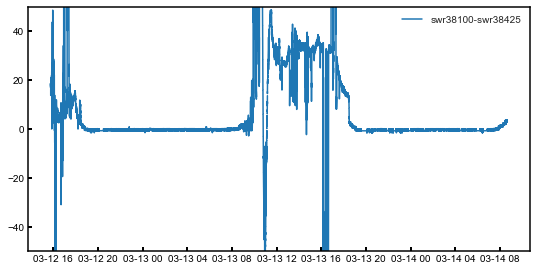

In [8]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(swdata['20190312_SWR_38100F3.txt']-swdata['20190312_SWR_38425F3.txt'],label='swr38100-swr38425')
ax1.set_ylim([-50,50])

plt.legend()


In [9]:
lwdata.keys()

dict_keys(['20190312_LWR_38812F3.txt', '20190312_LWR_38810F3.txt'])

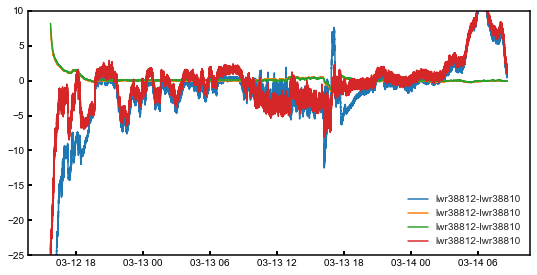

In [10]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(lwdata['20190312_LWR_38812F3.txt']-lwdata['20190312_LWR_38810F3.txt'],label='lwr38812-lwr38810')
ax1.set_ylim([-25,10])
plt.legend()

### One-One Plots

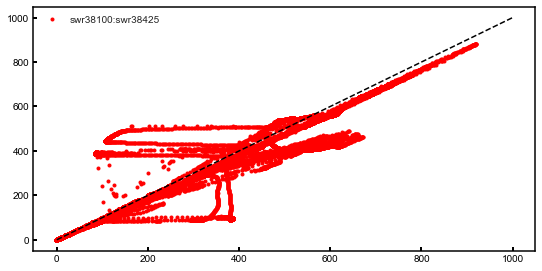

In [11]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(swdata['20190312_SWR_38100F3.txt']['2019-03-13'].resample('1s').mean(),
         swdata['20190312_SWR_38425F3.txt']['2019-03-13'].resample('1s').mean(),
         '.r',
         label='swr38100:swr38425')
plt.plot(range(0,1000),range(0,1000),'k--')
plt.legend()


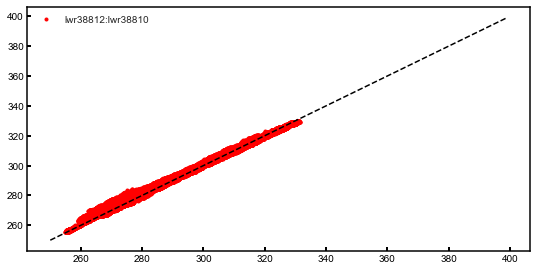

In [12]:
fig = plt.figure(1,figsize=(9,4.5))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(lwdata['20190312_LWR_38812F3.txt']['2019-03-13']['lw'].resample('1s').mean(),
         lwdata['20190312_LWR_38810F3.txt']['2019-03-13']['lw'].resample('1s').mean(),
         '.r',
         label='lwr38812:lwr38810')
plt.plot(range(250,400),range(250,400),'k--')
plt.legend()


### Calculate SZA as this is more comparable paramter than irradiance

In [13]:
from pysolar.solar import *
import datetime

### example below
date = datetime.datetime.now(tz=datetime.timezone.utc)
print(get_altitude(42.206, -71.382, date))
date = datetime.datetime(2007, 2, 18, 15, 13, 1, 130320, tzinfo=datetime.timezone.utc)
print(get_altitude(42.206, -71.382, date))

-40.59312029282827
30.91446827139096


In [14]:
### seattle, wa
lat = 47.6602
lon = -122.3321


In [15]:
for unit, value in swdata.items():
    count=0
    value['sza'] = np.nan
    value = value.tz_localize('US/Pacific')
    for index, row in value.iterrows():
        value['sza'][index] = get_altitude(lat, lon, index)
        if (count % 3600) == 0:
            print(row)
        count+=1
        
    swdata[unit] = value

sw     513.828000
sza     30.041008
Name: 2019-03-12 15:44:53-07:00, dtype: float64
sw     127.905000
sza     22.279754
Name: 2019-03-12 16:44:53-07:00, dtype: float64
sw     211.943000
sza     13.260299
Name: 2019-03-12 17:44:53-07:00, dtype: float64
sw     11.231000
sza     3.626369
Name: 2019-03-12 18:44:53-07:00, dtype: float64
sw     0.624000
sza   -6.642269
Name: 2019-03-12 19:44:52-07:00, dtype: float64
sw      1.440000
sza   -16.610335
Name: 2019-03-12 20:44:52-07:00, dtype: float64
sw      1.440000
sza   -26.056933
Name: 2019-03-12 21:44:52-07:00, dtype: float64
sw     -1.008000
sza   -34.430496
Name: 2019-03-12 22:44:52-07:00, dtype: float64
sw      0.624000
sza   -40.970728
Name: 2019-03-12 23:44:52-07:00, dtype: float64
sw      2.256000
sza   -44.740523
Name: 2019-03-13 00:44:52-07:00, dtype: float64
sw      2.256000
sza   -44.973567
Name: 2019-03-13 01:44:51-07:00, dtype: float64
sw      1.440000
sza   -41.614263
Name: 2019-03-13 02:44:51-07:00, dtype: float64
sw      2.25

In [16]:
for unit, value in lwdata.items():
    count=0
    value['sza'] = np.nan
    value = value.tz_localize('US/Pacific')
    for index, row in value.iterrows():
        value['sza'][index] = get_altitude(lat, lon, index)
        if (count % 3600) == 0:
            print(row)
        count+=1
        
    lwdata[unit] = value

lwnet   -146.60000
c1        15.58000
c2        15.92000
lw       255.90000
sza       30.28714
Name: 2019-03-12 15:42:44-07:00, dtype: float64
lwnet    -52.600000
c1         8.650000
c2         8.760000
lw       307.500000
sza       22.583467
Name: 2019-03-12 16:42:44-07:00, dtype: float64
lwnet    -85.800000
c1         8.010000
c2         7.920000
lw       266.600000
sza       13.600838
Name: 2019-03-12 17:42:43-07:00, dtype: float64
lwnet    -84.900000
c1         5.340000
c2         5.590000
lw       261.700000
sza        3.973614
Name: 2019-03-12 18:42:43-07:00, dtype: float64
lwnet    -36.200000
c1         3.130000
c2         3.170000
lw       295.000000
sza       -6.278167
Name: 2019-03-12 19:42:42-07:00, dtype: float64
lwnet     -8.500000
c1         4.480000
c2         4.500000
lw       328.900000
sza      -16.256638
Name: 2019-03-12 20:42:42-07:00, dtype: float64
lwnet    -27.900000
c1         4.040000
c2         4.100000
lw       308.200000
sza      -25.728111
Name: 2019-03-12 

In [17]:
lwdata

{'20190312_LWR_38812F3.txt':                            lwnet     c1     c2     lw        sza
 time                                                            
 2019-03-12 15:42:44-07:00 -146.6  15.58  15.92  255.9  30.287140
 2019-03-12 15:42:45-07:00 -146.5  15.58  15.92  256.0  30.285242
 2019-03-12 15:42:46-07:00 -146.2  15.58  15.92  256.3  30.283344
 2019-03-12 15:42:47-07:00 -146.1  15.58  15.92  256.4  30.281445
 2019-03-12 15:42:48-07:00 -145.9  15.58  15.92  256.6  30.279546
 2019-03-12 15:42:49-07:00 -145.9  15.58  15.90  255.9  30.277648
 2019-03-12 15:42:50-07:00 -145.8  15.58  15.90  256.1  30.275749
 2019-03-12 15:42:51-07:00 -145.7  15.58  15.90  256.2  30.273850
 2019-03-12 15:42:52-07:00 -145.7  15.58  15.90  256.2  30.271950
 2019-03-12 15:42:53-07:00 -145.7  15.58  15.90  256.2  30.270051
 2019-03-12 15:42:54-07:00 -145.9  15.55  15.90  256.4  30.268151
 2019-03-12 15:42:55-07:00 -146.3  15.55  15.87  255.4  30.266251
 2019-03-12 15:42:56-07:00 -146.5  15.55  15.87 

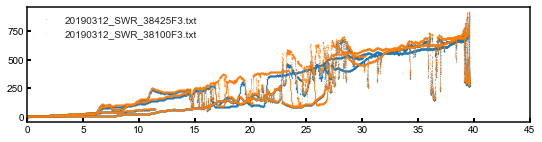

In [18]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

for unit, value in swdata.items():
    plt.plot(value.sza,value.sw,'.',markersize=.25,label=unit)
    
ax1.set_xlim([0,45])

plt.legend()


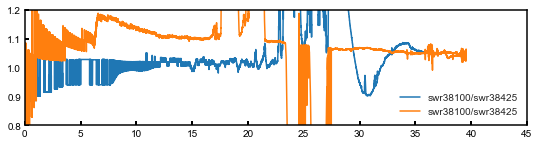

In [28]:
fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(swdata['20190312_SWR_38425F3.txt']['2019-03-13 00:00:00':'2019-03-13 12:00:00'].resample('1s').mean().sza,
         swdata['20190312_SWR_38100F3.txt']['2019-03-13 00:00:00':'2019-03-13 12:00:00'].resample('1s').mean().sw/swdata['20190312_SWR_38425F3.txt']['2019-03-13 00:00:00':'2019-03-13 12:00:00'].resample('1s').mean().sw,label='swr38100/swr38425')
plt.plot(swdata['20190312_SWR_38425F3.txt']['2019-03-13 12:00:00':'2019-03-14 00:00:00'].resample('1s').mean().sza,
         swdata['20190312_SWR_38100F3.txt']['2019-03-13 12:00:00':'2019-03-14 00:00:00'].resample('1s').mean().sw/swdata['20190312_SWR_38425F3.txt']['2019-03-13 12:00:00':'2019-03-14 00:00:00'].resample('1s').mean().sw,label='swr38100/swr38425')
ax1.set_xlim([0,45])
ax1.set_ylim([.8,1.2])

plt.legend()


In [20]:
swdata['20190312_SWR_38100F3.txt']-swdata['20190312_SWR_38425F3.txt']

,sw,sza
time,,
2019-03-12 15:42:54-07:00,NaN,NaN
2019-03-12 15:42:55-07:00,NaN,NaN
2019-03-12 15:42:56-07:00,NaN,NaN
2019-03-12 15:42:57-07:00,NaN,NaN
2019-03-12 15:42:58-07:00,NaN,NaN
2019-03-12 15:42:59-07:00,NaN,NaN
2019-03-12 15:43:00-07:00,NaN,NaN
2019-03-12 15:43:01-07:00,NaN,NaN
2019-03-12 15:43:02-07:00,NaN,NaN
